   # DATA - ANALYSIS [ ENGAGE]

# INTRODUCTION


**What is Data Analysis?**

Data Analysisis understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in DA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of DA, we can ask to define the problem statement or definition on our data set which is very important.

I got a very beautiful data-set of cars from Kaggle. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine Size, HP, Transmission Type, highway MPG, city MPG and many more.

# 1.Importing Required Libraries

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns # Data Visualisation
import matplotlib.pyplot as plt # Data Visualisation
%matplotlib inline
sns.set(color_codes=True)

## 2.LOADING DATA INTO FRAME !

Loading the data into the pandas data frame is certainly one of the most important steps in DA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [2]:
df = pd.read_csv("data[1].csv")
df.head(5) #to display top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#To display bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 3.Checking the data -type !

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format .

In [4]:
# checking data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### 4.Dropping unnecessary columns

This step is certainly needed in every DA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Market Category, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [5]:
# Dropping unnecessary columns
df = df.drop(["Market Category","Number of Doors","Vehicle Size"],axis=1)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Convertible,28,18,3916,34500


### 5.Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [6]:
# Renaming the columns
df = df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price","Engine Fuel Type":"Fuel"})
df.head()

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Drive Mode,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Convertible,28,18,3916,34500


## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.



In [7]:

# checking duplicate entries

duplicate_df = df[df.duplicated()]
print("Number of Duplicate rows : ",duplicate_df.shape)

# use count the number of rows before removing the data
df.count()

Number of Duplicate rows :  (732, 13)


Make             11914
Model            11914
Year             11914
Fuel             11911
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

In [8]:
# total number of rows and columns
df.shape

(11914, 13)

In [9]:
# Dropping the duplicates
df = df.drop_duplicates()
df.head()

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Drive Mode,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Convertible,28,18,3916,34500


In [10]:
# counting the number of rows after removing dupicates
df.count()

Make             11182
Model            11182
Year             11182
Fuel             11179
HP               11113
Cylinders        11152
Transmission     11182
Drive Mode       11182
Vehicle Style    11182
MPG-H            11182
MPG-C            11182
Popularity       11182
Price            11182
dtype: int64

## 7.Dropping the missing or null values

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [11]:
#finding the null values

print(df.isnull().sum())

Make              0
Model             0
Year              0
Fuel              3
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


**This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.**

In [12]:
# dropping the missing values

df= df.dropna()
df.count()

Make             11081
Model            11081
Year             11081
Fuel             11081
HP               11081
Cylinders        11081
Transmission     11081
Drive Mode       11081
Vehicle Style    11081
MPG-H            11081
MPG-C            11081
Popularity       11081
Price            11081
dtype: int64

**Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).**

In [13]:
# after dropping the null values
print(df.isnull().sum())

Make             0
Model            0
Year             0
Fuel             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


## 8.Detecting Outlier 

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.

<AxesSubplot:>

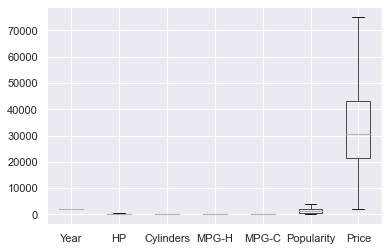

In [14]:
df.boxplot(showfliers=False)

<AxesSubplot:xlabel='Price'>

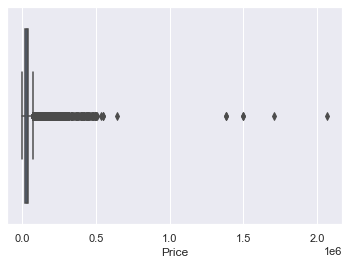

In [15]:
sns.boxplot(x=df["Price"])


<AxesSubplot:xlabel='HP'>

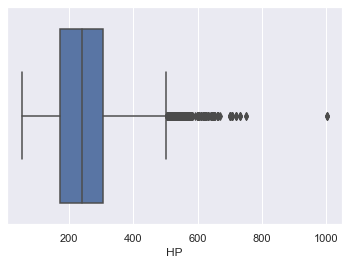

In [16]:
sns.boxplot(x=df["HP"])

<AxesSubplot:xlabel='Cylinders'>

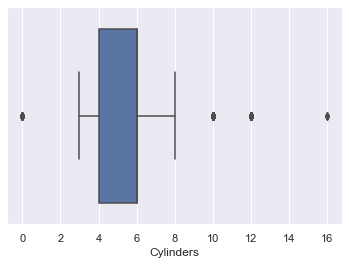

In [17]:
sns.boxplot(x=df["Cylinders"])

<AxesSubplot:xlabel='Popularity'>

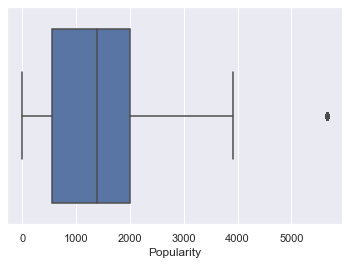

In [18]:

sns.boxplot(x=df["Popularity"])

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              132.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21460.0
dtype: float64


In [20]:
df.shape

(11081, 13)

## 8.Data visualisation 

**Histogram**



Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'Cylinders'}>],
       [<AxesSubplot:title={'center':'MPG-H'}>,
        <AxesSubplot:title={'center':'MPG-C'}>,
        <AxesSubplot:title={'center':'Popularity'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

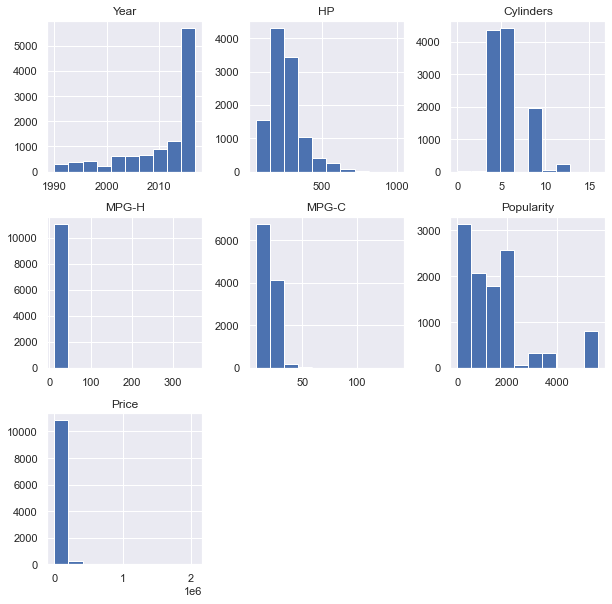

In [21]:
df.hist(figsize=(10,10))

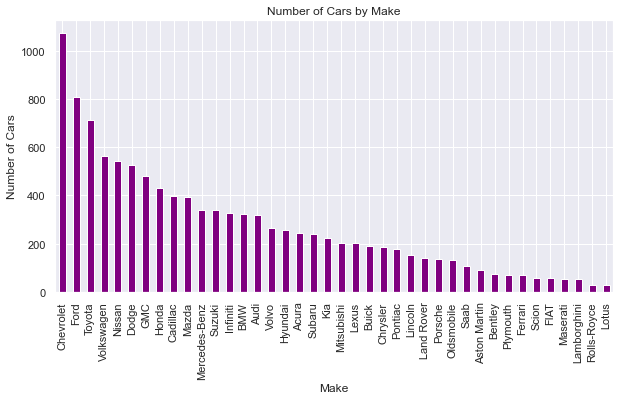

In [22]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5),color="purple")
plt.title("Number of Cars by Make")
plt.ylabel("Number of Cars")
plt.xlabel("Make");

<AxesSubplot:>

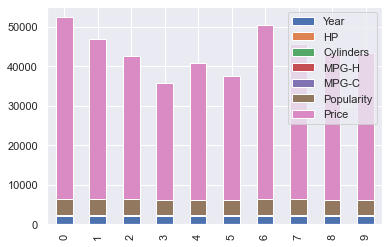

In [23]:
df.head(10).plot(kind='bar',stacked=True)

### TOP 10 CARS MANUFACTURE !

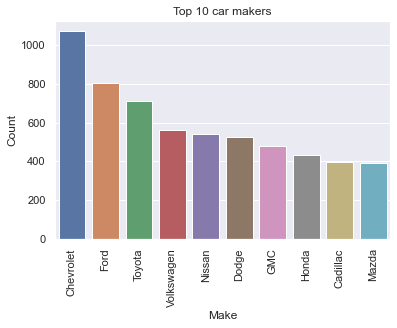

In [24]:
#plt.figure(figsize=(7,3))
top_ten = df.groupby("Make").size().sort_values(ascending=False).head(10)
top_ten_df = pd.DataFrame(top_ten.reset_index(name="Count"))
plt.title('Top 10 car makers')
plt.ylabel('Number of cars')
plt.xticks(rotation=90)
sns.barplot(x='Make', y='Count', data=top_ten_df);

**From the above bar plot we can infer that most of the people buy cars from Chevrolet, Ford, Toyota and Volkswagen as they produce more economical cars which can affored by more people.**

## Cars produced over the years

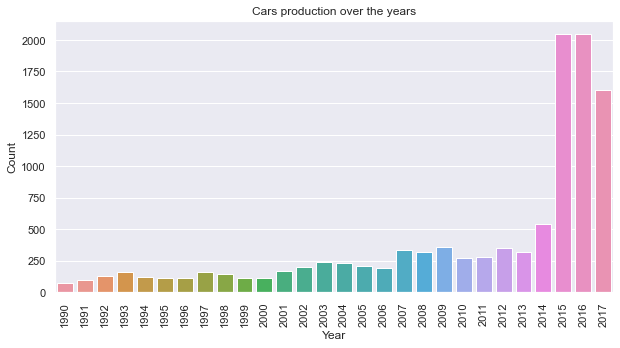

In [25]:

plt.figure(figsize=(10,5))
cars_prod_df = pd.DataFrame(
    df.groupby("Year")
    .size()
    .reset_index(name="Count")
)
plt.title('Cars production over the years')
plt.xticks(rotation=90)
sns.barplot(x="Year", y="Count", data=cars_prod_df);

**From the above chart we can see that cars production has increased over the years. In year 2017 though, we see a dip in the number of cars produced. It could also be because of incomplete data for 2017.**

## Fuel types per Year

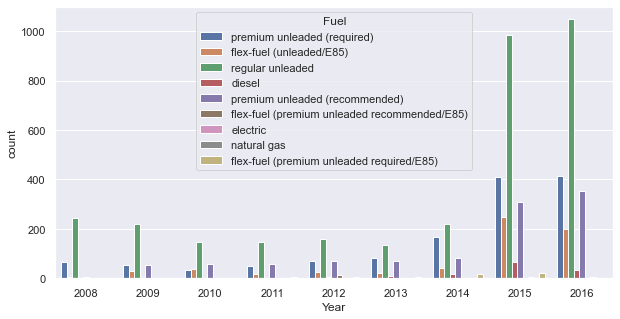

In [26]:
plt.figure(figsize=(10,5))
fueldf = df[(df['Year'] > 2007) & (df['Year'] < 2017)].copy()
ax = sns.countplot(x="Year", hue="Fuel", data=fueldf)
plt.show()

## Line Plot

**Line Plot show the relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters**

<AxesSubplot:>

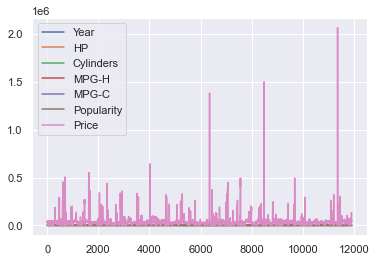

In [27]:

df.plot()



In [28]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='HP', ylabel='Price'>

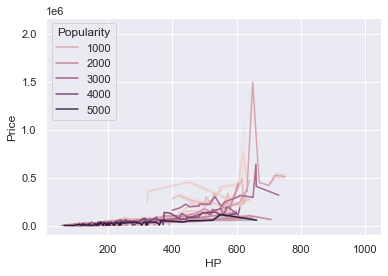

In [29]:
sns.lineplot(df['HP'],df['Price'],df['Popularity'])


## Scatterplot 


**We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below.**

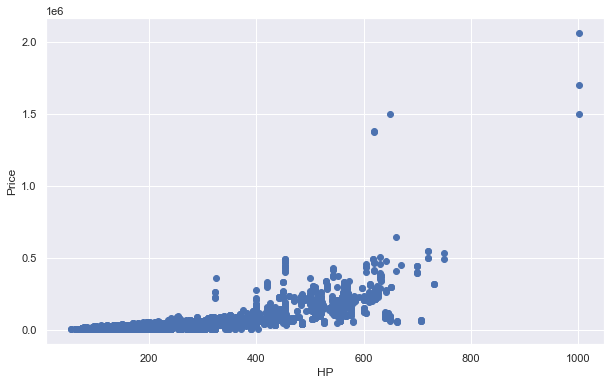

In [30]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()


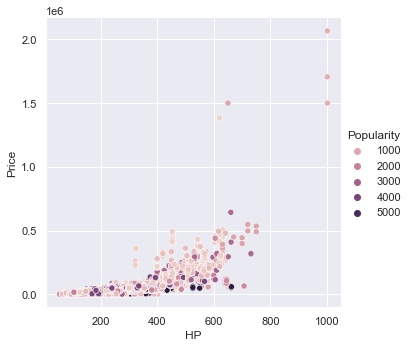

In [31]:
sns.relplot(data=df,x="HP",y="Price",hue="Popularity")


### Violin-Plot

<AxesSubplot:>

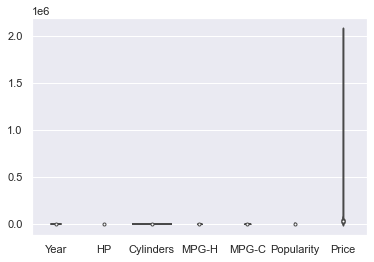

In [32]:
sns.violinplot(data=df)


<AxesSubplot:xlabel='Popularity', ylabel='Vehicle Style'>

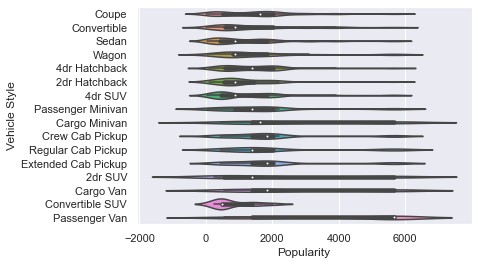

In [33]:
sns.violinplot(data=df,x="Popularity",y="Vehicle Style")

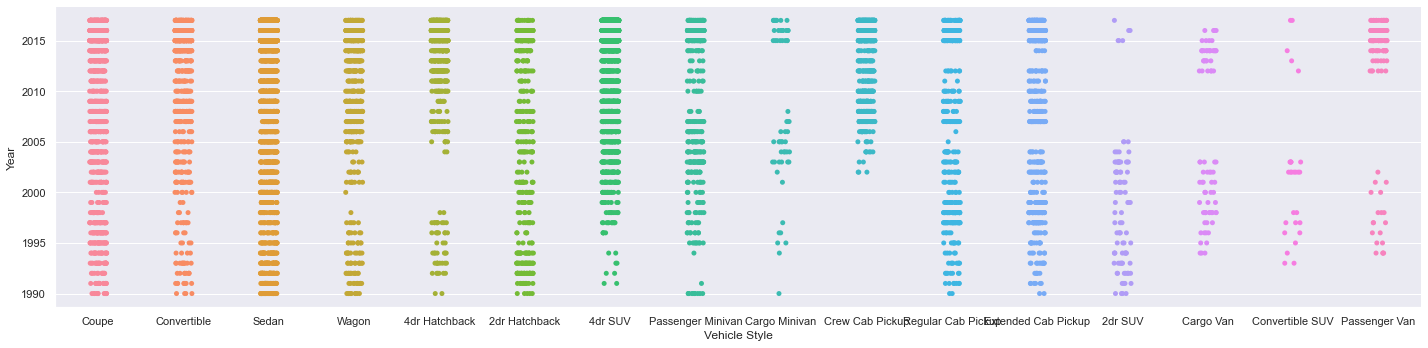

In [34]:
sns.catplot(data=df,
            x="Vehicle Style",
            y="Year",
            kind="strip",
           aspect = 4)

## Heatmaps

**Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.**

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.336394,-0.026009,0.264159,0.218789,0.088304,0.208364
HP,0.336394,1.000000,0.789184,-0.424959,-0.475846,0.042346,0.659282
Cylinders,-0.026009,0.789184,1.000000,-0.614795,-0.634440,0.042686,0.553099
MPG-H,0.264159,-0.424959,-0.614795,1.000000,0.842742,-0.024474,-0.208915
MPG-C,0.218789,-0.475846,-0.634440,0.842742,1.000000,-0.006693,-0.233686
Popularity,0.088304,0.042346,0.042686,-0.024474,-0.006693,1.000000,-0.047765
Price,0.208364,0.659282,0.553099,-0.208915,-0.233686,-0.047765,1.000000


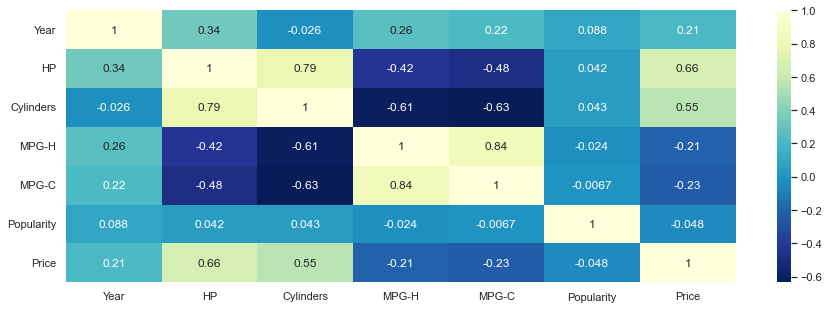

In [35]:
# find relation betweeb the variables
plt.figure(figsize=(15,5))
c = df.corr()
sns.heatmap(c,cmap="YlGnBu_r",annot=True)
c


 ## LET'S CHECK !!

 ### Has use of diesel cars increased or decresed over the years?

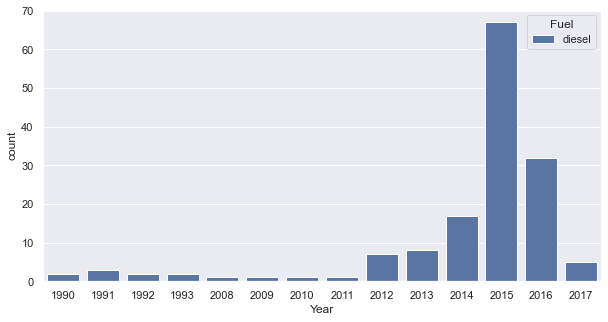

In [36]:
plt.figure(figsize=(10,5))
diesel_df = df[df['Fuel'].str.contains('diesel')].copy()
ax = sns.countplot(x="Year", hue="Fuel", data=diesel_df)
plt.show()


**Use of diesel cars increased steadily from 2010 to 2015. Thereafter, the usage has gone down drastically which could be attributed to the stricter pollution laws coming in.**

###  Has production of SUVs increased over the years?

<AxesSubplot:xlabel='Year'>

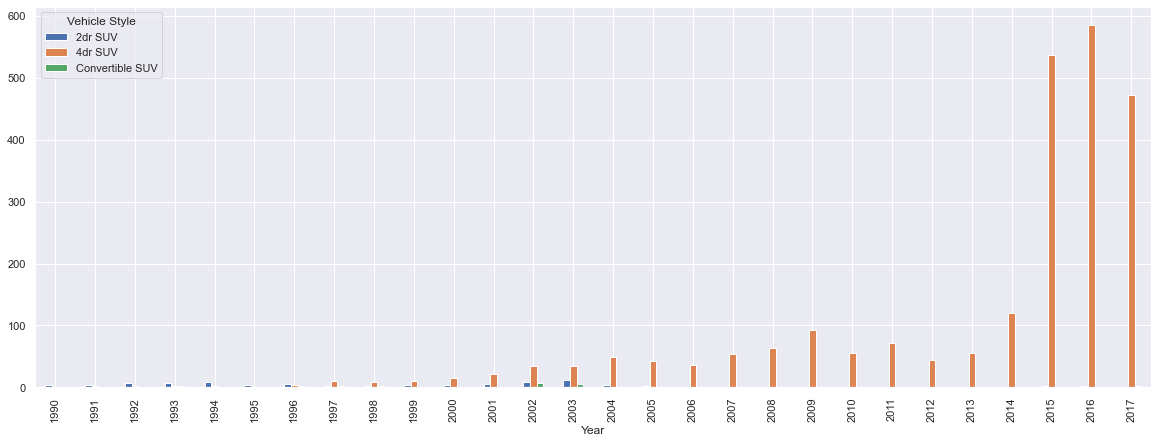

In [37]:
vs_df = df[df['Vehicle Style'].str.contains('SUV')].groupby(['Year', 'Vehicle Style']).size().reset_index(name="Count");
df_pivot =  pd.pivot_table(
    vs_df, 
    values="Count",
    index="Year",
    columns="Vehicle Style",
    aggfunc=np.mean
)

df_pivot.plot(kind="bar", figsize=(20, 7))

**From the graph we can cleary see that SUV production has gone up significantly as compared to previous decades.**

### Which brand is least popular and which one is most popular?

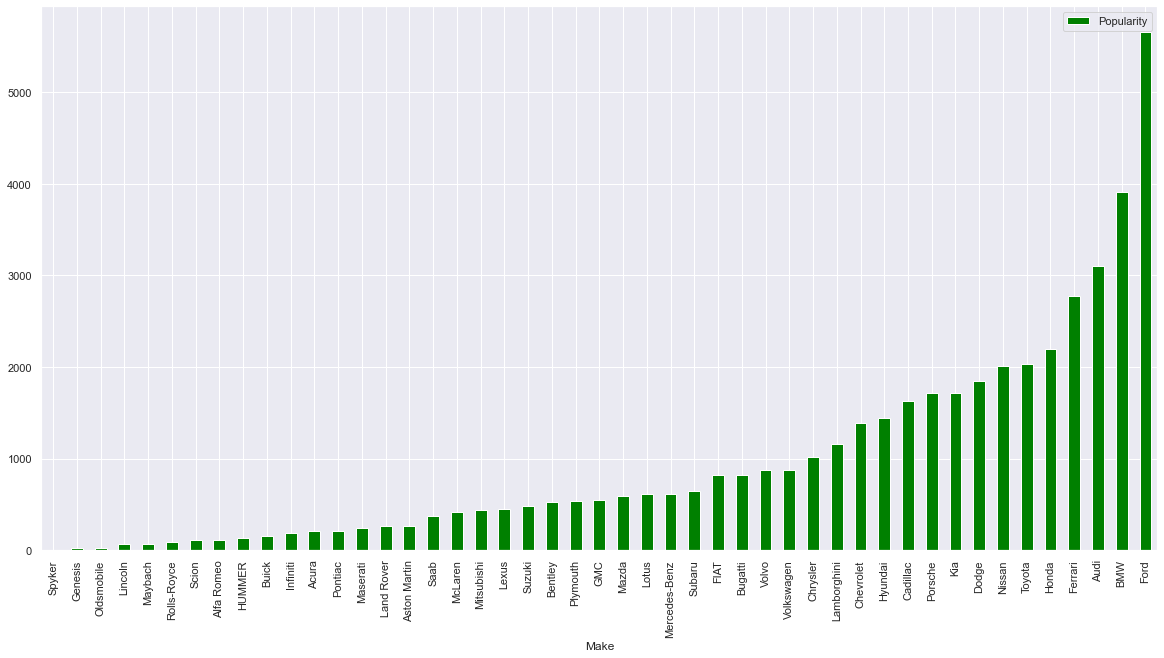

In [38]:
# Popular Cars
popcars_df = df[['Make', 'Popularity']].sort_values('Popularity')
popcars_df = popcars_df.drop_duplicates()
popcars_df.plot(kind="bar", x="Make", figsize=(20,10),color="green");

**Spyker is least popular and Ford is most popular brand.**

## Conclusion


1.Our analysis shows that Price of the car positively correlates with higher Engine specifications like more horsepower.


2.Using the above conclusion we can also form a linear relationship between the variables to predict price of the car based on engine specifications.


3.The use of E85 fuel has gone up over the years as green initiatives have picked up the pace. More people prefer greener alternatives now.


4.Production of SUVs increased rapidly in last few years.


5.Ford is the most popular brand in the world but Chevrolet produced most cars.